# Librairies

In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pylab as plt
import contextily as cx

# Load data

In [2]:
# Sensors location and AADT
gdf = gpd.read_file('raw/trafiktaelling.json')

(12.448485028, 12.652680932, 55.61184151, 55.734989150000004)

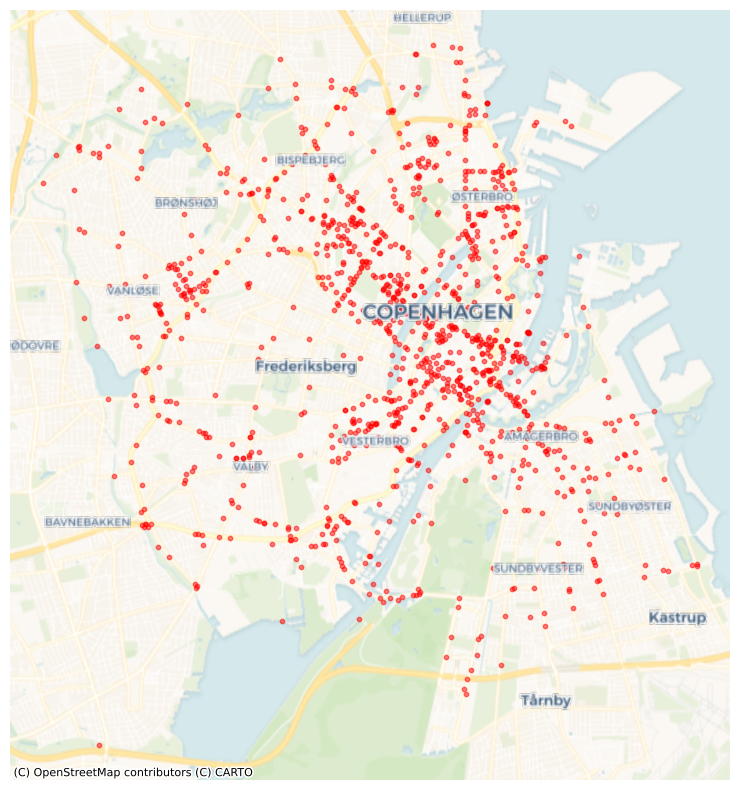

In [3]:
# Plot sensors
ax = gdf.plot(color = 'r', markersize = 10, alpha = .5, figsize = (10,10))
# Add context in backround
cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerNoLabels)

cx.add_basemap(ax, crs = gdf.crs, source=cx.providers.CartoDB.VoyagerOnlyLabels)

# Remove lat lon
plt.axis('off')

In [4]:
gdf.columns

Index(['id', 't_nr', 'vejnavn', 'beskrivelse', 'husnummer', 'type',
       'taelling_type', 'ktj_7_19', 'tung_pct', 'aadt_koretojer',
       'hvdt_koretojer', 'cykler_7_19', 'ladcykler_pct', 'aadt_cykler',
       'hvdt_cykler', 'fod_7_19', 'aadt_fod_7_19', 'hvdt_fod_7_19', 'fod_7_21',
       'aadt_fod_7_21', 'hvdt_fod_7_21', 'fod_7_24', 'aadt_fod_7_24',
       'hvdt_fod_7_24', 'aadt_fod_label', 'taelle_dato', 'aar', 'link',
       'tung_pct_real', 'ladcykler_pct_real', 'lastbiler_7_19',
       'lastbiler_pct', 'elloebehjul_7_19', 'elloebehjul_pct',
       'andre_busser_7_19', 'ogc_fid', 'geometry'],
      dtype='object')

In [5]:
gdf.type.unique()

array(['Point', None], dtype=object)

In [6]:
gdf = gdf.rename(columns = {
    "t_nr":  "ID" ,
  "vejnavn":  "raw_name",
  "beskrivelse": "Description",
  "ktj_7_19": "Vehicles 7 AM to 7 PM",
  #"tung_pct": "Percentage of heavy vehicles",
  "aadt_koretojer": "AADT",
  #"hvdt_koretojer":  "Peak Hour Daily Traffic (PHD) for vehicles",
  "taelle_dato":  "Counting date" ,
  "aar":  "Year" ,
  "tung_pct_real":  "TR_pct_AADT" ,
 # "lastbiler_pct": "Percentage of trucks" ,
  "ogc_fid":"Feature ID" ,
})[[
   # "ID",
    'raw_name',
    "Description",
    "AADT",
 "TR_pct_AADT",
  # "Counting date" ,
   "Year" ,
   "geometry"
]]

In [7]:
gdf.dropna(subset=['AADT', 'geometry'], inplace=True)

In [8]:
# Never the same sensor locations
gdf.geometry.unique().size

592

In [9]:
gdf.Year.unique()

array([2022, 2023, 2021, 2019, 2018, 2014, 2015, 2017, 2016, 2013, 2011,
       2009, 2024, 2012, 2025, 2010, 2020])

In [10]:
# Number of sensor location is highly variable
gdf.Year.value_counts().sort_index()

Year
2009     25
2010     21
2011     18
2012     33
2013     13
2014     46
2015     41
2016     40
2017     22
2018     27
2019     29
2020      2
2021     36
2022     57
2023    171
2024     13
2025      1
Name: count, dtype: int64

In [11]:
gdf

,raw_name,Description,AADT,TR_pct_AADT,Year,geometry
0,H.C. Andersens Boulevard,sydøst for Jarmers Plads,47900.0,4.0,2022,POINT (12.56549 55.67796)
1,Bredgade,nord for Kongens Nytorv,12300.0,2.6,2023,POINT (12.5876 55.68116)
2,Christian d. IV's Bro,syd for Niels Juels Gade,12200.0,0.3,2023,POINT (12.58719 55.67556)
3,Dronning Louises Bro,øst for Nørrebrogade,3900.0,16.0,2023,POINT (12.56377 55.68673)
4,Kampmannsgade,ud for søerne,4000.0,3.2,2023,POINT (12.55788 55.67796)
...,...,...,...,...,...,...
1162,Bellahøjvej,TRAFIK,12600.0,2.5,2024,POINT (12.49695 55.69459)
1163,Borrebyvej,TRAFIK,300.0,1.4,2024,POINT (12.49495 55.69442)
1164,Brønshøjvej,TRAFIK,2100.0,2.1,2024,POINT (12.49923 55.6954)
1165,Skellet,TRAFIK,3200.0,4.4,2024,POINT (12.49546 55.67206)


## Map matching with OSM

In [12]:
# This should be done with gdf prior to join

import sys
from pathlib import Path

# Add the ../assets directory to sys.path
sys.path.append(str(Path("../../assets").resolve()))

from map_matching_OSM import points_matching

In [13]:
gdf = points_matching(gdf)

City downloaded


  3%|▎         | 16/595 [00:00<00:03, 151.32it/s]

Value Error - No roads found nearby current index


 21%|██        | 122/595 [00:00<00:02, 195.35it/s]

Value Error - No roads found nearby current index


 27%|██▋       | 162/595 [00:00<00:02, 191.53it/s]

Value Error - No roads found nearby current index


 50%|█████     | 298/595 [00:01<00:01, 205.48it/s]

Value Error - No roads found nearby current index
Value Error - No roads found nearby current index


 58%|█████▊    | 345/595 [00:01<00:01, 215.34it/s]

Value Error - No roads found nearby current index
Value Error - No roads found nearby current index


 65%|██████▌   | 388/595 [00:01<00:01, 202.22it/s]

Value Error - No roads found nearby current index
Value Error - No roads found nearby current index
Value Error - No roads found nearby current index


 72%|███████▏  | 429/595 [00:02<00:00, 174.71it/s]

Value Error - No roads found nearby current index
Value Error - No roads found nearby current index
Value Error - No roads found nearby current index
Value Error - No roads found nearby current index


 79%|███████▉  | 470/595 [00:02<00:00, 184.30it/s]

Value Error - No roads found nearby current index


 90%|█████████ | 538/595 [00:02<00:00, 192.50it/s]

Value Error - No roads found nearby current index


100%|██████████| 595/595 [00:03<00:00, 197.39it/s]

We failed to match 16 sensors
...on a total of 595 sensors


In [14]:
# Remove 0 values 
gdf = gdf[gdf.AADT != 0]

In [15]:
gdf[['raw_name', 'osm_name']].dropna()[:25].drop_duplicates()

,raw_name,osm_name
0,H.C. Andersens Boulevard,H.C. Andersens Boulevard
1,Bredgade,Bredgade
2,Christian d. IV's Bro,Christian D. IV's Bro
3,Dronning Louises Bro,Dronning Louises Bro
4,Kampmannsgade,Kampmannsgade
5,Ellebjergvej,Ellebjergvej
6,Englandsvej,Englandsvej
7,Farvergade,Farvergade
9,Frederiksborggade,Frederiksborggade
10,Frederiksborgvej,Frederiksborgvej


In [16]:
# These roads seem to be mainly "pedestrian" or "service roads" according to OSM
gdf[gdf.osmid.isna()]

,raw_name,Description,AADT,TR_pct_AADT,Year,geometry,osm_name,osm_type,osm_lanes,osm_oneway,osm_distance,osm_maxspeed,osmid
82,Frederiksberggade,nordøst for Rådhuspladsen,100.0,NaN,2023,POINT (12.56976 55.67665),NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,Fiolstræde,syd for Nørre Voldgade,200.0,NaN,2023,POINT (12.57181 55.68244),NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Amagermotorvejen,vestlige ben,32200.0,4.2,2021,POINT (12.55417 55.64037),NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,Amagermotorvejen,østlige ben,21800.0,7.6,2021,POINT (12.55856 55.64063),NaN,NaN,NaN,NaN,NaN,NaN,NaN
325,Vilhelm Topsøes Vej,øst for Herman Bangs Plads,200.0,4.5,2012,POINT (12.50375 55.66727),NaN,NaN,NaN,NaN,NaN,NaN,NaN
430,Rentemestervej,Rentemestervej 22 SV.f. Frederiksborgvej,2000.0,0.9,2014,POINT (12.53262 55.70546),NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,Kompagnistræde,nordøst for Knabrostræde,300.0,NaN,2018,POINT (12.57592 55.67734),NaN,NaN,NaN,NaN,NaN,NaN,NaN
576,Langeliniekaj,ved Langelinie Allé,2300.0,NaN,2011,POINT (12.60015 55.69553),NaN,NaN,NaN,NaN,NaN,NaN,NaN
674,Købmagergade,Fodgængere_cykler,200.0,NaN,2018,POINT (12.57953 55.67928),NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Final saving

In [17]:
from validate_dataset import validate_dataset

gdf = validate_dataset(gdf)

Number of NaN values for AADT: 0
Number of NaN values for geometry: 0
Number of <=1 values for AADT: 0
Number of >1e5 values for AADT: 0


In [18]:
gdf.columns

Index(['raw_name', 'Description', 'AADT', 'TR_pct_AADT', 'Year', 'geometry',
       'osm_name', 'osm_type', 'osm_lanes', 'osm_oneway', 'osm_distance',
       'osm_maxspeed', 'osmid'],
      dtype='object')

In [19]:
for year in range(2015, 2025):
    gdf[gdf.Year == year].drop(['Year', 'Description'], axis = 1).to_file(f'treated/Copenhagen_AADT_{year}.geojson', index = False)